In [2]:
import numpy as np
import pandas as pd
import pickle

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore');

In [3]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer

In [5]:
import pandas as pd                                                        #for data manipulation
import numpy as np                                                         #for numerical operations
from matplotlib import pyplot as plt                                       #for visualization
import seaborn as sns                                                      #for visualization
from sklearn.ensemble import RandomForestClassifier                        #for using Random forest Classifier algorithm
from sklearn.metrics import accuracy_score

In [6]:
X_train = pd.read_csv('X_train.csv')

In [7]:
X_test = pd.read_csv('X_test.csv')

In [8]:
y_train = pd.read_csv('y_train.csv')

In [9]:
y_test = pd.read_csv('y_test.csv')

In [10]:
n_estimators=10
base_models = []

# Đánh giá hoặc kiểm tra mô hình

In [28]:
#imporing the randomforest classifier from sklearn ensemble.
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# random forest model creation
rfc = RandomForestClassifier()
# training the model
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)
metrics.accuracy_score(y_test,rfc_predict)

0.7222222222222222

In [29]:
rfc_predict


array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [30]:
# importing the classification report and confusion matrix from sklearn metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# printing the confusion matrix statistics and classification report
print(confusion_matrix(y_test, rfc_predict))
print(classification_report(y_test, rfc_predict))

[[87 12]
 [43 56]]
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        99
           1       0.82      0.57      0.67        99

    accuracy                           0.72       198
   macro avg       0.75      0.72      0.72       198
weighted avg       0.75      0.72      0.72       198



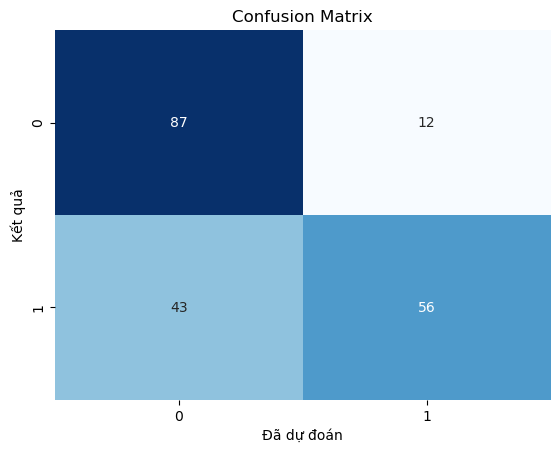

In [31]:
cm = confusion_matrix(y_test, rfc_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Đã dự đoán')
plt.ylabel('Kết quả')
plt.title('Confusion Matrix')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
import pickle
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [24]:
# Định nghĩa mô hình
rf = RandomForestClassifier(random_state=42)

# Định nghĩa lưới các tham số để thử nghiệm
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [25]:
# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Huấn luyện mô hình với GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [26]:
# Tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# Độ chính xác tốt nhất
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8367158385093167


In [27]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Đánh giá mô hình
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.7323232323232324


In [35]:
rfc1=RandomForestClassifier(random_state=42, n_estimators= 200, max_depth=20, min_samples_leaf= 2,min_samples_split = 2)

In [36]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

In [39]:
pred=rfc1.predict(X_test)

In [40]:
pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [41]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test,pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,pred))
print('\n')
#print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())
print("Accuracy for Random Forest on CV data: ",metrics.accuracy_score(y_test,pred))

=== Confusion Matrix ===
[[81 18]
 [36 63]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        99
           1       0.78      0.64      0.70        99

    accuracy                           0.73       198
   macro avg       0.74      0.73      0.72       198
weighted avg       0.74      0.73      0.73       198



Accuracy for Random Forest on CV data:  0.7272727272727273


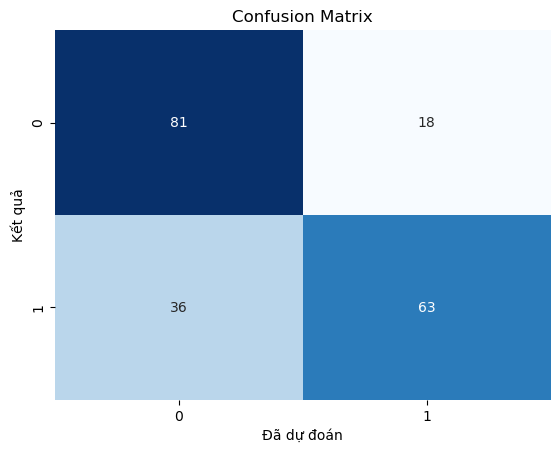

In [42]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Đã dự đoán')
plt.ylabel('Kết quả')
plt.title('Confusion Matrix')
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
import pickle
rfc1 = RandomForestClassifier(n_estimators=200)
rfc1.fit(X_train, y_train)
with open('Random_Forest.pkl', 'wb') as file:
    pickle.dump(rfc1, file)
